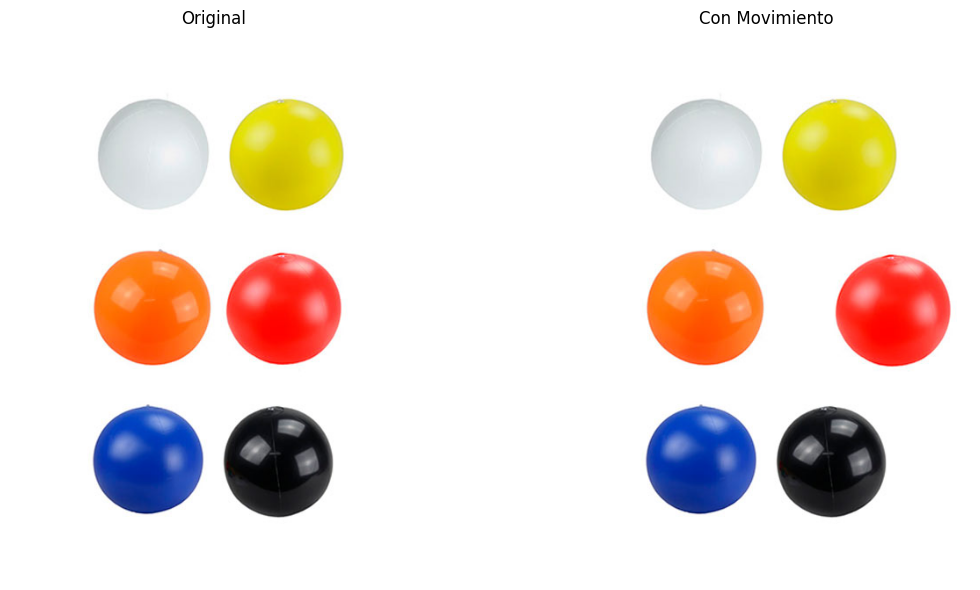

In [1]:
# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the images again
image_original = cv2.imread('./PELOTASLISAS-COLORES.jpg')
image_moved = cv2.imread('./PELOTASLISAS-COLORES-MOVIMIENTO.png')

# Visualize the images side by side
fig, axarr = plt.subplots(1, 2, figsize=(12, 6))
axarr[0].imshow(cv2.cvtColor(image_original, cv2.COLOR_BGR2RGB))
axarr[0].set_title('Original')
axarr[0].axis('off')

axarr[1].imshow(cv2.cvtColor(image_moved, cv2.COLOR_BGR2RGB))
axarr[1].set_title('Con Movimiento')
axarr[1].axis('off')

plt.tight_layout()
plt.show()


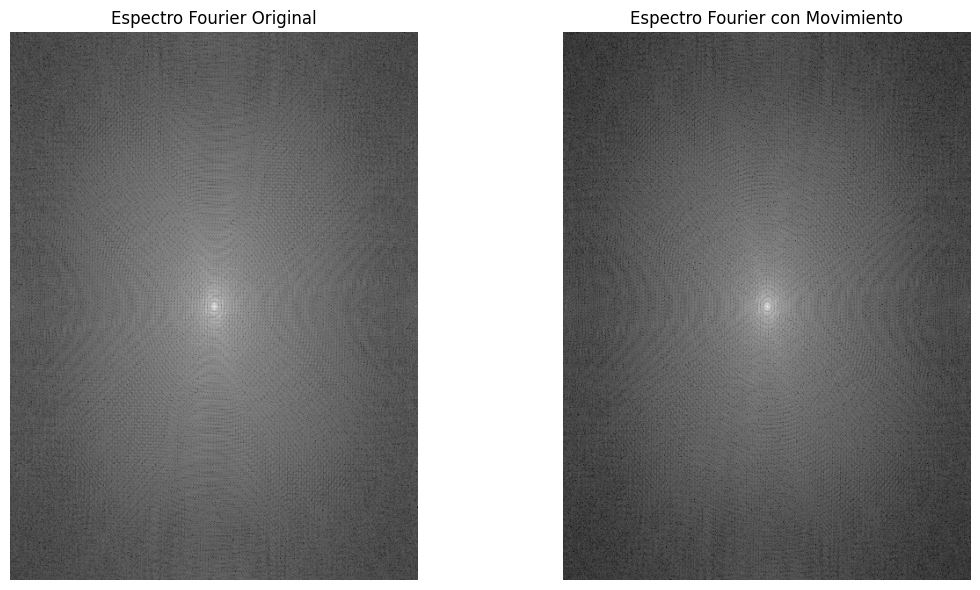

In [2]:
def compute_fourier_magnitude(image):
    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Compute the 2D Fourier Transform
    f_transform = np.fft.fft2(gray_image)
    
    # Shift the zero-frequency components to the center of the spectrum
    f_transform_centered = np.fft.fftshift(f_transform)
    
    # Get magnitude spectrum
    magnitude_spectrum = np.log(np.abs(f_transform_centered) + 1)
    
    return magnitude_spectrum

# Compute Fourier magnitude for both images
magnitude_original = compute_fourier_magnitude(image_original)
magnitude_moved = compute_fourier_magnitude(image_moved)

# Visualize the Fourier Magnitude side by side
fig, axarr = plt.subplots(1, 2, figsize=(12, 6))
axarr[0].imshow(magnitude_original, cmap='gray')
axarr[0].set_title('Espectro Fourier Original')
axarr[0].axis('off')

axarr[1].imshow(magnitude_moved, cmap='gray')
axarr[1].set_title('Espectro Fourier con Movimiento')
axarr[1].axis('off')

plt.tight_layout()
plt.show()


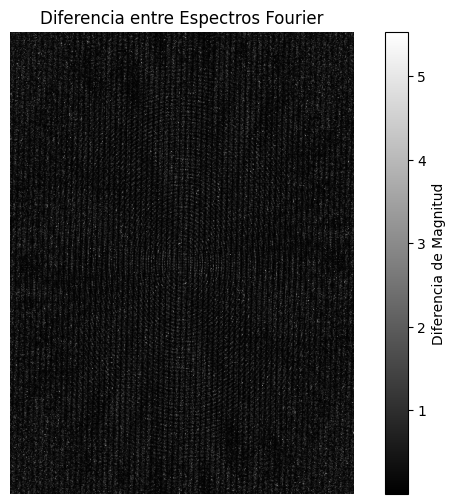

In [3]:
# Compute the difference between the Fourier magnitudes
difference = np.abs(magnitude_original - magnitude_moved)

# Visualize the difference
plt.figure(figsize=(8, 6))
plt.imshow(difference, cmap='gray')
plt.title('Diferencia entre Espectros Fourier')
plt.axis('off')
plt.colorbar(label='Diferencia de Magnitud')
plt.show()


In [6]:
def detect_movement(magnitude_original, magnitude_moved, threshold=10):
    """Detect movement based on the difference in Fourier magnitudes."""
    difference_sum = np.sum(np.abs(magnitude_original - magnitude_moved))
    return difference_sum > threshold

# Detect movement
movement_detected = detect_movement(magnitude_original, magnitude_moved)
movement_detected



True